In [1]:
import numpy as np, plottools as pl, local, tools_cmb, quad_func, binning as bn, analysis as ana
from matplotlib.pyplot import *
import warnings
warnings.filterwarnings("ignore")

In [2]:
def snr(qobj,rlz=None,cn=1,lmin=40,lmax=2048,bnum=10):
    mb = bn.multipole_binning(bnum,lmin=lmin,lmax=lmax)
    Mkk, Vkk, Skk, __, nb = local.load_spec(qobj,mb,rlz=rlz,cn=cn,outN0=True)
    print(np.sqrt(np.sum(Mkk**2/Vkk**2)))
    st = ana.amplitude(Mkk,Skk,fcb=None,diag=False,disp=True)
    # plot binned spectrum lin-scale
    pl.plot_1dstyle(fsize=[10,4],xmin=mb.lmin,xmax=lmax,ylab='$C_L^{\kappa\kappa}$')
    errorbar(mb.bc+5,Mkk,yerr=Vkk,fmt='o')
    plot(aobj.l,aobj.ckk,color='k',ls='--')
    axhline(0,color='k')
    show()

In [4]:
dirs = local.data_directory()
qobj = {}
for wind, ivar, ascale in [('iso15','V3',3.),('com15','noivar',3.),('com16','noivar',1.)]:
    aobj = local.init_analysis_params(qid='comb_n',ascale=ascale,wind=wind,ivar=ivar)
    qobj[wind] = quad_func.reconstruction(dirs['local'],aobj.ids,stag=aobj.stag,rlmin=500,qlist=['TT'])

3.3251635095910137
obs A 1.0 mean(A) 1.006 sigma(A) 0.426 S/N 2.345 A>oA 0.96


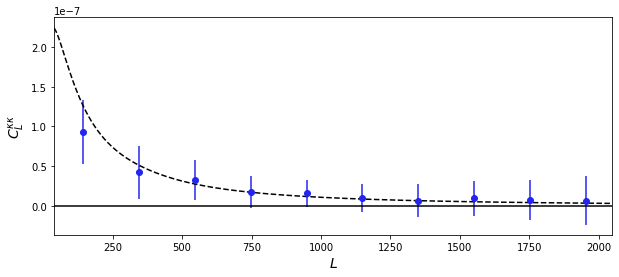

In [5]:
snr(qobj['iso15'],bnum=10)

6.500896791538965
obs A 1.0 mean(A) 1.001 sigma(A) 0.204 S/N 4.908 A>oA 0.98


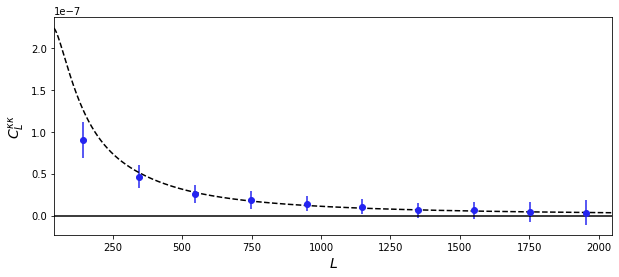

In [7]:
local.plot_spec_kk(qobj['com16'],bnum=10)
#plot_spec(qobj,bnum=10,lmin=40,cn=1)

6.500896791538965
obs A 1.0 mean(A) 1.001 sigma(A) 0.204 S/N 4.908 A>oA 0.98


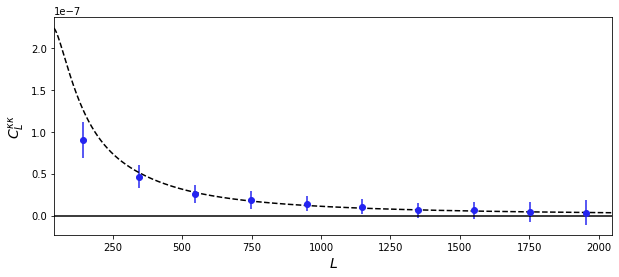

In [8]:
snr(qobj['com16'],bnum=10)

3.287847477459365
obs A 1.0 mean(A) 1.003 sigma(A) 0.412 S/N 2.427 A>oA 0.9


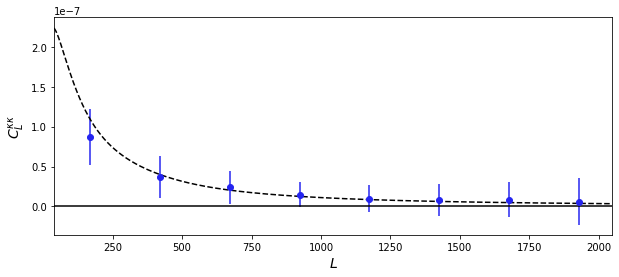

In [9]:
snr(qobj['iso15'],bnum=8)

10.638068603756555
obs A 1.0 mean(A) 1.001 sigma(A) 0.121 S/N 8.261 A>oA 1.0


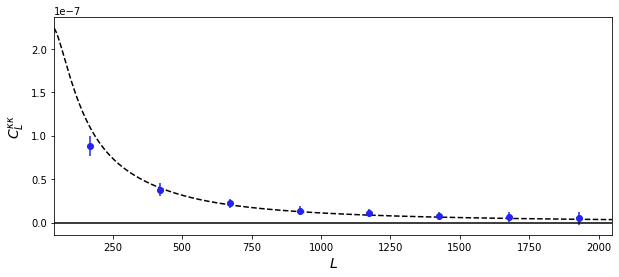

In [10]:
snr(qobj['com15'],bnum=8)

11.072340727065031
obs A 1.0 mean(A) 1.0 sigma(A) 0.12 S/N 8.334 A>oA 0.96


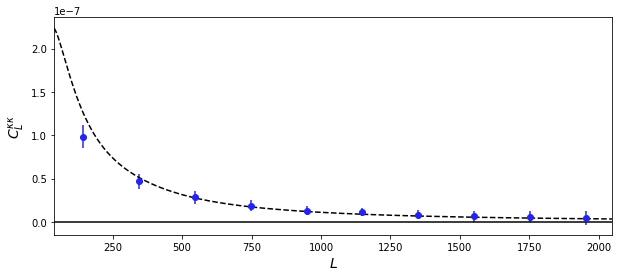

In [11]:
local.plot_spec_kk(qobj['com15'],bnum=10,lmin=40)